In [1]:
import requests
import json
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import math
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cmpen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
news_json['totalResults']

4395

In [33]:
analyzer = SentimentIntensityAnalyzer()
sentiment_array = []
x=0
url = ('https://newsapi.org/v2/everything?'
       'q=apple&'
       'pageSize=100&'
       'from=2021-04-25&'
       'sortBy=popularity&'
       'language=en&'
       'apiKey=191975de9ce849c6875435b1f90a29f7')

response = requests.get(url)
news_json = json.loads(response.text)
clean = news_json['articles'][0:]


#  titles1 = [news['title'] for news in clean ]
# urls1 =[news['url'] for news in clean ]
# descriptions1 =[news['description'] for news in clean ]
# content1 =[news['content'] for news in clean ]

for news in clean: 
    
    pos = analyzer.polarity_scores(news['description'])["pos"]
    neu = analyzer.polarity_scores(news['description'])["neu"]
    neg = analyzer.polarity_scores(news['description'])["neg"]
    
    sentiment_array.append({"date": news['publishedAt'],
                            "titles": news['title'].lower(),
                            "urls": news['url'],
                            "content" :news['content'].lower(),
                            "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg})
    



In [13]:
response.text

'{"message":"The request is invalid."}'

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',500)

In [30]:
sentiment_array

[{'date': '2021-04-27T20:00:00Z',
  'titles': "the best new features in telegram's massive update",
  'urls': 'https://lifehacker.com/the-best-new-features-in-telegrams-massive-update-1846774695',
  'content': 'a substantial new version of telegram is rolling out now for all platforms. the update includes new shopping features for buyers and sellers, updated voice chat tools for groups, new gesture controls… [+5039 chars]',
  'Positive': 0.049,
  'Neutral': 0.951,
  'Negative': 0.0},
 {'date': '2021-04-26T20:30:00Z',
  'titles': "how to hide from advertisers with ios 14.5's new 'app tracking transparency' settings",
  'urls': 'https://lifehacker.com/how-to-hide-from-advertisers-with-ios-14-5s-new-app-tra-1846766232',
  'content': 'one ios 14s headline featuresin that it is making headlines by pissing off advertisersis app tracking transparency, a setting that lets users opt out of all tracking, including the data an app collec… [+2141 chars]',
  'Positive': 0.0,
  'Neutral': 0.88,
  'N

In [24]:
sentiments_df = pd.DataFrame(sentiment_array)
sentiments_df['date'] = sentiments_df['date'].str.split('T',expand=True)
sentiments_df

,date,titles,urls,content,Positive,Neutral,Negative
0,2021-04-27,the best new features in telegram's massive up...,https://lifehacker.com/the-best-new-features-i...,a substantial new version of telegram is rolli...,0.049,0.951,0.000
1,2021-04-26,how to hide from advertisers with ios 14.5's n...,https://lifehacker.com/how-to-hide-from-advert...,one ios 14s headline featuresin that it is mak...,0.000,0.880,0.120
2,2021-04-26,this simple carrot salad is the perfect summer...,https://skillet.lifehacker.com/this-simple-car...,"despite its fancy reputation, most french cook...",0.093,0.802,0.104
3,2021-04-26,apple will build another us campus in north ca...,https://www.engadget.com/apple-build-us-campus...,between the disruption to foreign manufacturin...,0.000,1.000,0.000
4,2021-04-27,spotify counters apple with its own podcast su...,https://www.engadget.com/spotify-podcast-subsc...,almost immediately following apple's announcem...,0.096,0.904,0.000
...,...,...,...,...,...,...,...
95,2021-04-28,psg vs man city live stream: how to watch uefa...,https://www.androidcentral.com/psg-man-city-li...,the uefa champions league continues today as l...,0.214,0.786,0.000
96,2021-04-25,leeds united vs man united live stream: how to...,https://www.androidcentral.com/leeds-united-vs...,while there won't be any fans at elland road f...,0.144,0.856,0.000
97,2021-04-27,"ipvanish download: how to install on android, ...",https://www.androidcentral.com/donwnload-ipvanish,"even if you've heard of the service, you might...",0.122,0.878,0.000
98,2021-04-27,apple explains how unlocking iphone with apple...,https://www.macrumors.com/2021/04/27/apple-unl...,"with the launch of ios 14.5 and watchos 7.4, a...",0.048,0.952,0.000


In [29]:
sentiments_df['content'][0]

'a substantial new version of telegram is rolling out now for all platforms. the update includes new shopping features for buyers and sellers, updated voice chat tools for groups, new gesture controls… [+5039 chars]'

In [242]:
title_list = "how to hide from advertisers with ios 14.5's new 'app tracking transparency' settings"
fliter = (sentiments_df['titles']== title_list)
sentiments_df[fliter]

,date,titles,urls,descriptions,Positive,Neutral,Negative
0,2021-04-26,how to hide from advertisers with ios 14.5's new 'app tracking transparency' settings,https://lifehacker.com/how-to-hide-from-advertisers-with-ios-14-5s-new-app-tra-1846766232,"one ios 14’s headline features—in that it is making headlines by pissing off advertisers—is “app tracking transparency,” a setting that lets users opt out of all tracking, including the data an app collects when you’re not using it (much to the chagrin of adv…",0.0,0.88,0.12


In [249]:
key_word = 'ios'
title_list = list(sentiments_df['titles'])
test = []
for i in title_list:
    if key_word in i:
        fliter = (sentiments_df['titles']== i)
        url_list = sentiments_df[fliter]['urls']
        test.append({'title':i,
                     'url':url_list})
print(test)

[{'title': "how to hide from advertisers with ios 14.5's new 'app tracking transparency' settings", 'url': 0    https://lifehacker.com/how-to-hide-from-advertisers-with-ios-14-5s-new-app-tra-1846766232
Name: urls, dtype: object}, {'title': 'the new ios update lets you stop ads from tracking you', 'url': 10    https://www.wired.com/story/ios-app-tracking-transparency-advertising/
Name: urls, dtype: object}, {'title': 'ios 14.5 is out now with new face id mask features and apple’s app tracking transparency', 'url': 11    https://www.theverge.com/2021/4/26/22403554/apple-ios-ipados-14-5-now-available-iphone-unlock-face-mask-app-tracking
Name: urls, dtype: object}, {'title': "apple's ios 14.5 update with a masked unlock feature is here", 'url': 23    https://gizmodo.com/apples-ios-14-5-update-with-a-masked-unlock-feature-is-1846721775
Name: urls, dtype: object}, {'title': 'how to block apps from tracking your activity in ios 14.5', 'url': 24    https://gizmodo.com/how-to-block-apps-from-tr

# TF-IDF

In [ ]:
def get_tokens(text):
    lowers = text.lower()
    #remove the punctuation using the character deletion step of translate
    remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
    no_punctuation = lowers.translate(remove_punctuation_map)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens

In [92]:
token_list=[]
for i in descriptions_list:
    tokens = get_tokens(i)
    token_list = token_list+tokens

['one', 'ios', '14', '’', 's', 'headline', 'features—in', 'that', 'it', 'is', 'making', 'headlines', 'by', 'pissing', 'off', 'advertisers—is', '“', 'app', 'tracking', 'transparency', '”', 'a', 'setting', 'that', 'lets', 'users', 'opt', 'out', 'of', 'all', 'tracking', 'including', 'the', 'data', 'an', 'app', 'collects', 'when', 'you', '’', 're', 'not', 'using', 'it', 'much', 'to', 'the', 'chagrin', 'of', 'adv…']
['despite', 'its', 'fancy', 'reputation', 'most', 'french', 'cooking', 'is', 'shockingly', 'simple', 'understated', 'even', 'which', 'is', 'what', 'can', 'make', 'it', 'so', 'difficult', 'to', 'master', 'besides', 'butter', 'there', '’', 's', 'nothing', 'much', 'to', 'hide', 'behind', 'and', 'a', 'lot', 'of', 'french', 'dishes', 'hinge', 'on', 'having', 'good', 'ingredients', 'and', 'de…']
['apple', 'plans', 'to', 'invest', '430', 'billion', 'in', 'the', 'us', 'economy', 'over', 'five', 'years', 'after', 'exceeding', 'its', 'previous', 'domestic', 'target']
['meanwhile', 'macos'

In [100]:
token_list

['one',
 'ios',
 '14',
 '’',
 's',
 'headline',
 'features—in',
 'that',
 'it',
 'is',
 'making',
 'headlines',
 'by',
 'pissing',
 'off',
 'advertisers—is',
 '“',
 'app',
 'tracking',
 'transparency',
 '”',
 'a',
 'setting',
 'that',
 'lets',
 'users',
 'opt',
 'out',
 'of',
 'all',
 'tracking',
 'including',
 'the',
 'data',
 'an',
 'app',
 'collects',
 'when',
 'you',
 '’',
 're',
 'not',
 'using',
 'it',
 'much',
 'to',
 'the',
 'chagrin',
 'of',
 'adv…',
 'despite',
 'its',
 'fancy',
 'reputation',
 'most',
 'french',
 'cooking',
 'is',
 'shockingly',
 'simple',
 'understated',
 'even',
 'which',
 'is',
 'what',
 'can',
 'make',
 'it',
 'so',
 'difficult',
 'to',
 'master',
 'besides',
 'butter',
 'there',
 '’',
 's',
 'nothing',
 'much',
 'to',
 'hide',
 'behind',
 'and',
 'a',
 'lot',
 'of',
 'french',
 'dishes',
 'hinge',
 'on',
 'having',
 'good',
 'ingredients',
 'and',
 'de…',
 'apple',
 'plans',
 'to',
 'invest',
 '430',
 'billion',
 'in',
 'the',
 'us',
 'economy',
 'over'

In [94]:
count = Counter(token_list)
print (count.most_common(10))

[('the', 143), ('a', 92), ('of', 84), ('to', 78), ('and', 72), ('apple', 51), ('new', 50), ('in', 46), ('on', 44), ('with', 35)]


# WordCloud

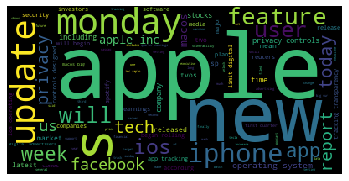

In [130]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# descriptions_list = " ".join(list(sentiments_df['descriptions']))
descriptions_list = " ".join(list(token_list))
cloud = WordCloud(background_color='black', max_words=100).generate(descriptions_list)
# wc = WordCloud(
#   background_color='black',        #   背景顏色
#   max_words=200,                   #   最大分詞數量
#   mask=None,                       #   背景圖片
#   max_font_size=None,              #   顯示字體的最大值
#   stopwords=STOPWORDS.add(word),   #   使用內置的屏蔽詞，再添加一個
#   font_path=font_path,             #   若為中文則需引入中文字型(.TTF)
#   random_state=None,               #   隨機碼生成各分詞顏色
#   prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例
plt.imshow(cloud)
plt.axis('off')
plt.show()
cloud.to_file('output.png')

In [126]:
word_count = WordCloud().process_text(descriptions_list)
word_count = sorted(word_count.items(), reverse=True, key=lambda x:x[1])
word_count_df = pd.DataFrame(word_count, columns = ['key','count'])
word_count_df[0:50]

,key,count
0,apple,54
1,new,54
2,s,22
3,monday,21
4,update,21
5,iphone,19
6,feature,19
7,user,17
8,will,16
9,ios,15


In [28]:
descriptions_list

'One iOS 14’s headline features—in that it is making headlines by pissing off advertisers—is “App Tracking Transparency,” a setting that lets users opt out of all tracking, including the data an app collects when you’re not using it (much to the chagrin of adv… Despite its fancy reputation, most French cooking is shockingly simple, understated even, which is what can make it so difficult to master. Besides butter, there’s nothing much to hide behind, and a lot of French dishes hinge on having good ingredients and de… Apple plans to invest $430 billion in the US economy over five years after exceeding its previous domestic target.. Meanwhile, macOS and tvOS add support for the latest PlayStation and Xbox controllers.. This refurbished 8th-gen iPad has been restored to nearly mint condition.. The vulnerability was patched Monday, but hackers had already used it to spread malware. Facebook and other advertisers fought the move, but App Tracking Transparency is finally here. Apple’s new iO

In [131]:
word_count

[('apple', 54),
 ('new', 54),
 ('s', 22),
 ('monday', 21),
 ('update', 21),
 ('iphone', 19),
 ('feature', 19),
 ('user', 17),
 ('will', 16),
 ('ios', 15),
 ('app', 13),
 ('week', 13),
 ('today', 11),
 ('tech', 10),
 ('privacy', 10),
 ('report', 10),
 ('us', 9),
 ('facebook', 9),
 ('apple inc', 9),
 ('macos', 8),
 ('operating system', 8),
 ('including', 7),
 ('company', 7),
 ('stocks', 7),
 ('time', 7),
 ('privacy controls', 7),
 ('tvos', 6),
 ('latest', 6),
 ('mean', 6),
 ('market', 6),
 ('released', 6),
 ('two', 6),
 ('sp', 6),
 ('spotify', 5),
 ('security', 5),
 ('companies', 5),
 ('comes', 5),
 ('media', 5),
 ('software', 5),
 ('according', 5),
 ('reuters', 5),
 ('earnings', 5),
 ('investors', 5),
 ('plan', 5),
 ('major', 5),
 ('release', 5),
 ('app tracking', 5),
 ('tracking transparency', 5),
 ('will begin', 5),
 ('begin rolling', 5),
 ('ios operating', 5),
 ('controls designed', 5),
 ('limit digital', 5),
 ('digital advertisers', 5),
 ('first quarter', 5),
 ('macos big', 5),
 ('o

In [208]:
pip install newsapi-python

  Using cached newsapi_python-0.2.6-py2.py3-none-any.whl (7.9 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\cmpen\anaconda3\python.exe -m pip install --upgrade pip' command.


In [20]:
import requests
import json
import pandas as pd

titles = []
url_s = []
sdescription = []

url = ('https://newsapi.org/v2/everything?'
       'q=台積電&'
       'pageSize=100&'
       'from=2021-03-27&'
       'sortBy=popularity&'
       'apiKey=191975de9ce849c6875435b1f90a29f7')
response = requests.get(url)
count = 4
news_json = json.loads(response.text)
clean = news_json['articles'][0:]

for news in clean:
    if count>0:
        titles.append((news['title']))
        url_s.append((news['url']))
        sdescription.append((news['description']))
    count
    
    -=1

print(titles,url_s,sdescription)

['200インチの大画面をどこにでも持ち運べる。手のひらサイズのプロジェクター「Samicon P2 PRO」', '1000億円超を調達しながら失敗に終わったEVのバッテリー交換ビジネスを復活させるAmple', 'ボストン・ダイナミクスの次期商用ロボットは退屈な倉庫仕事をこなす「Stretch」', '半導體要一路缺到2022年底！黃崇仁砸近3千億建廠，會如何解決晶片荒？'] ['https://japanese.engadget.com/samicon-p2-pro-013059257.html', 'https://jp.techcrunch.com/2021/03/27/2021-03-03-from-the-ashes-of-nearly-a-billion-dollars-ample-resurrects-better-places-battery-swapping-business-model/', 'https://jp.techcrunch.com/2021/03/30/2021-03-29-this-is-boston-dynamics-next-commercial-robot/', 'https://www.techbang.com/posts/85469-semiconductors-will-be-missing-all-the-way-to-the-end-of-2022'] ['＼ポイント／ スマホ画面を瞬時にスクリーン上の大画面に！ 斜めの角度からの投影も自動補正する台形補正機能 150ANSIルーメンの明るさ 2つの内蔵スピーカーにより音声効果を忠実に再現 2つの冷却ファンにより冷却効率アップ Rockchip RK3036チップ搭載 ポートが多くて対応デバイスも盛り沢山 「Samicon P2 PRO」は軽量で高画質、高性能な超小型モバイルプロジェクターです。 操作も簡単で、誰でもすぐに大画面の迫力ある映像をスクリーンに映し出すことができる画期的なアイテムです。 どこにでも簡単に持…', '今をさかのぼること13年とわずか、当時世界で最も力のあるソフトウェア企業の1つだったSAPでCEOへの道を歩んでいたShai Agassi（シャイ・アガシ）氏は、それまで専門的なキャリアを積み重ねてきた会社を離れ、Better Place（

In [3]:
clean

[{'source': {'id': None, 'name': 'Lifehacker.com'},
  'author': 'Brendan Hesse',
  'title': 'Learn the Secret Language of Apple Serial Numbers (While You Still Can)',
  'description': 'Apple is planning to reformat its serial numbers for Macs and MacBook this year. Currently, Macs use the same 12-digit alphanumeric serial codes as other Apple products, but Apple will soon switch them to randomized strings between 8 and 12 characters long.Re…',
  'url': 'https://lifehacker.com/learn-the-secret-language-of-apple-serial-numbers-whil-1846693527',
  'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/brqgqs1xpgk0ov85yrdd.jpg',
  'publishedAt': '2021-04-15T21:00:00Z',
  'content': 'Apple is planning to reformat its serial numbers for Macs and MacBook this year. Currently, Macs use the same 12-digit alphanumeric serial codes as other Apple products, but Apple will soon switch th… [+3651 chars]'},
 {'source': {'id': None